        u_q    coolant  stator_winding       u_d  stator_tooth  motor_speed  \
0 -0.450682  18.805172       19.086670 -0.350055     18.293219     0.002866   
1 -0.325737  18.818571       19.092390 -0.305803     18.294807     0.000257   
2 -0.440864  18.828770       19.089380 -0.372503     18.294094     0.002355   
3 -0.327026  18.835567       19.083031 -0.316199     18.292542     0.006105   
4 -0.471150  18.857033       19.082525 -0.332272     18.291428     0.003133   

        i_d       i_q         pm  stator_yoke    ambient    torque  profile_id  
0  0.004419  0.000328  24.554214    18.316547  19.850691  0.187101          17  
1  0.000606 -0.000785  24.538078    18.314955  19.850672  0.245417          17  
2  0.001290  0.000386  24.544693    18.326307  19.850657  0.176615          17  
3  0.000026  0.002046  24.554018    18.330833  19.850647  0.238303          17  
4 -0.064317  0.037184  24.565397    18.326662  19.850639  0.208197          17  


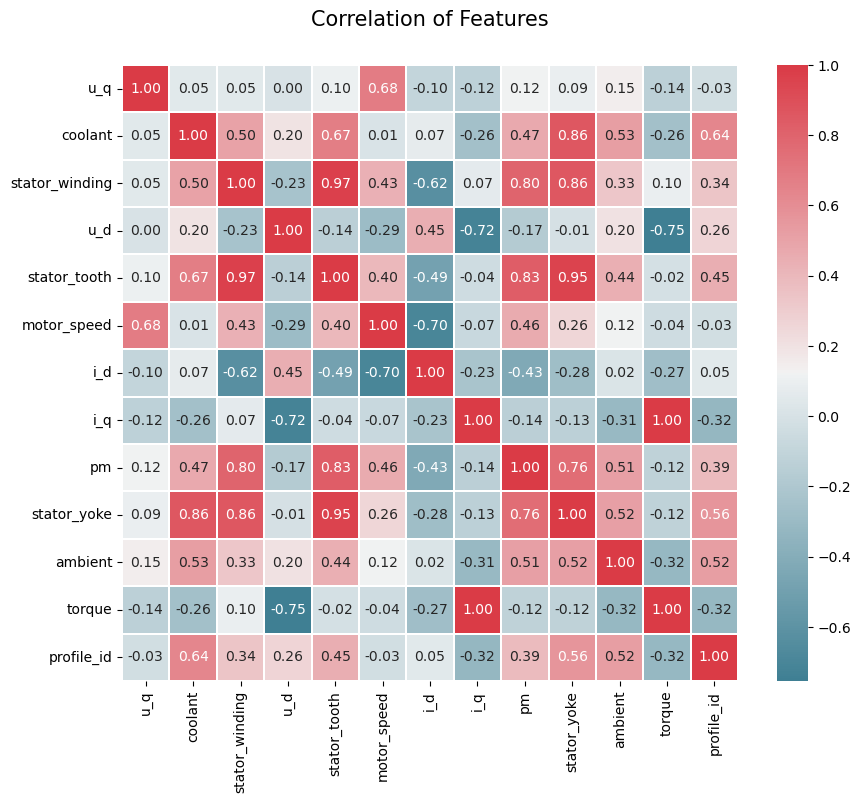

Training Data: (931571, 13)
Testing Data: (399245, 13)
Epoch 1/100
23290/23290 - 16s - 699us/step - accuracy: 0.6453 - loss: -3.1701e+06 - val_accuracy: 0.6444 - val_loss: -6.3398e+06
Epoch 2/100
23290/23290 - 16s - 666us/step - accuracy: 0.6453 - loss: -9.5107e+06 - val_accuracy: 0.6444 - val_loss: -1.2680e+07
Epoch 3/100
23290/23290 - 15s - 642us/step - accuracy: 0.6453 - loss: -1.5851e+07 - val_accuracy: 0.6444 - val_loss: -1.9020e+07
Epoch 4/100
23290/23290 - 16s - 696us/step - accuracy: 0.6453 - loss: -2.2192e+07 - val_accuracy: 0.6444 - val_loss: -2.5359e+07
Epoch 5/100
23290/23290 - 15s - 664us/step - accuracy: 0.6453 - loss: -2.8533e+07 - val_accuracy: 0.6444 - val_loss: -3.1699e+07
Epoch 6/100
23290/23290 - 15s - 660us/step - accuracy: 0.6453 - loss: -3.4873e+07 - val_accuracy: 0.6444 - val_loss: -3.8039e+07
Epoch 7/100
23290/23290 - 15s - 655us/step - accuracy: 0.6453 - loss: -4.1214e+07 - val_accuracy: 0.6444 - val_loss: -4.4379e+07
Epoch 8/100
23290/23290 - 16s - 698us/step

Epoch 64/100
23290/23290 - 16s - 692us/step - accuracy: 0.6453 - loss: -4.0264e+08 - val_accuracy: 0.6444 - val_loss: -4.0576e+08
Epoch 65/100
23290/23290 - 15s - 665us/step - accuracy: 0.6453 - loss: -4.0898e+08 - val_accuracy: 0.6444 - val_loss: -4.1210e+08
Epoch 66/100
23290/23290 - 16s - 686us/step - accuracy: 0.6453 - loss: -4.1532e+08 - val_accuracy: 0.6444 - val_loss: -4.1844e+08
Epoch 67/100
23290/23290 - 16s - 680us/step - accuracy: 0.6453 - loss: -4.2167e+08 - val_accuracy: 0.6444 - val_loss: -4.2479e+08
Epoch 68/100
23290/23290 - 16s - 708us/step - accuracy: 0.6453 - loss: -4.2801e+08 - val_accuracy: 0.6444 - val_loss: -4.3113e+08
Epoch 69/100
23290/23290 - 16s - 669us/step - accuracy: 0.6453 - loss: -4.3435e+08 - val_accuracy: 0.6444 - val_loss: -4.3747e+08
Epoch 70/100
23290/23290 - 19s - 828us/step - accuracy: 0.6453 - loss: -4.4070e+08 - val_accuracy: 0.6444 - val_loss: -4.4381e+08
Epoch 71/100
23290/23290 - 667s - 29ms/step - accuracy: 0.6453 - loss: -4.4704e+08 - val_a

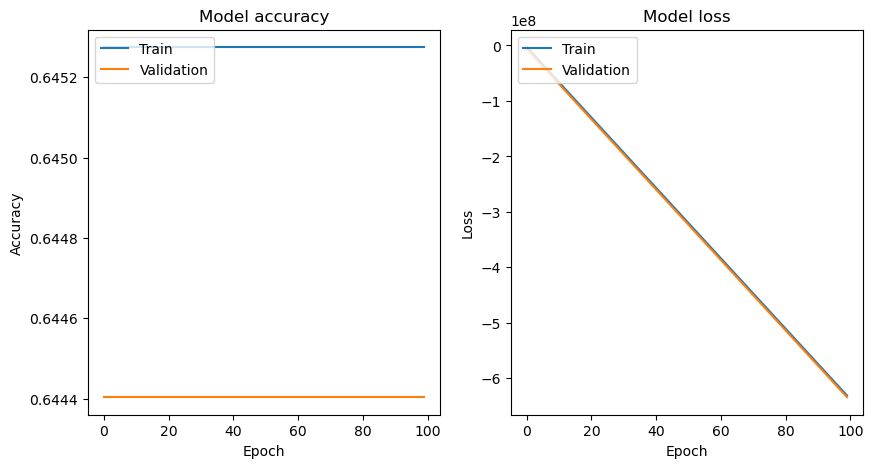

In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Load dataset (replace with actual file path)
data_path = "C:\\Users\\User\\Downloads\\measures_v2.csv\\measures_v2.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
print(data.head())

# Visualize the correlation matrix
corr = data.corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2f',
            cmap=colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of Features', y=1.05, size=15)
plt.show()

# Split dataset into train and test
train, test = train_test_split(data, test_size=0.3, random_state=42)
print("Training Data:", train.shape)
print("Testing Data:", test.shape)

# Separate input features and output labels
input_features = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d', 'i_q']
output_labels = ['pm', 'stator_yoke', 'stator_winding', 'stator_tooth']

train_x = train[input_features]
test_x = test[input_features]
train_y = train[output_labels]
test_y = test[output_labels]

# Normalize the input features
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(train_x.shape[1],)),
    tf.keras.layers.Dense(units=train_y.shape[1], activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model
train_loss, train_acc = model.evaluate(train_x, train_y, verbose=2)
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=2)
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


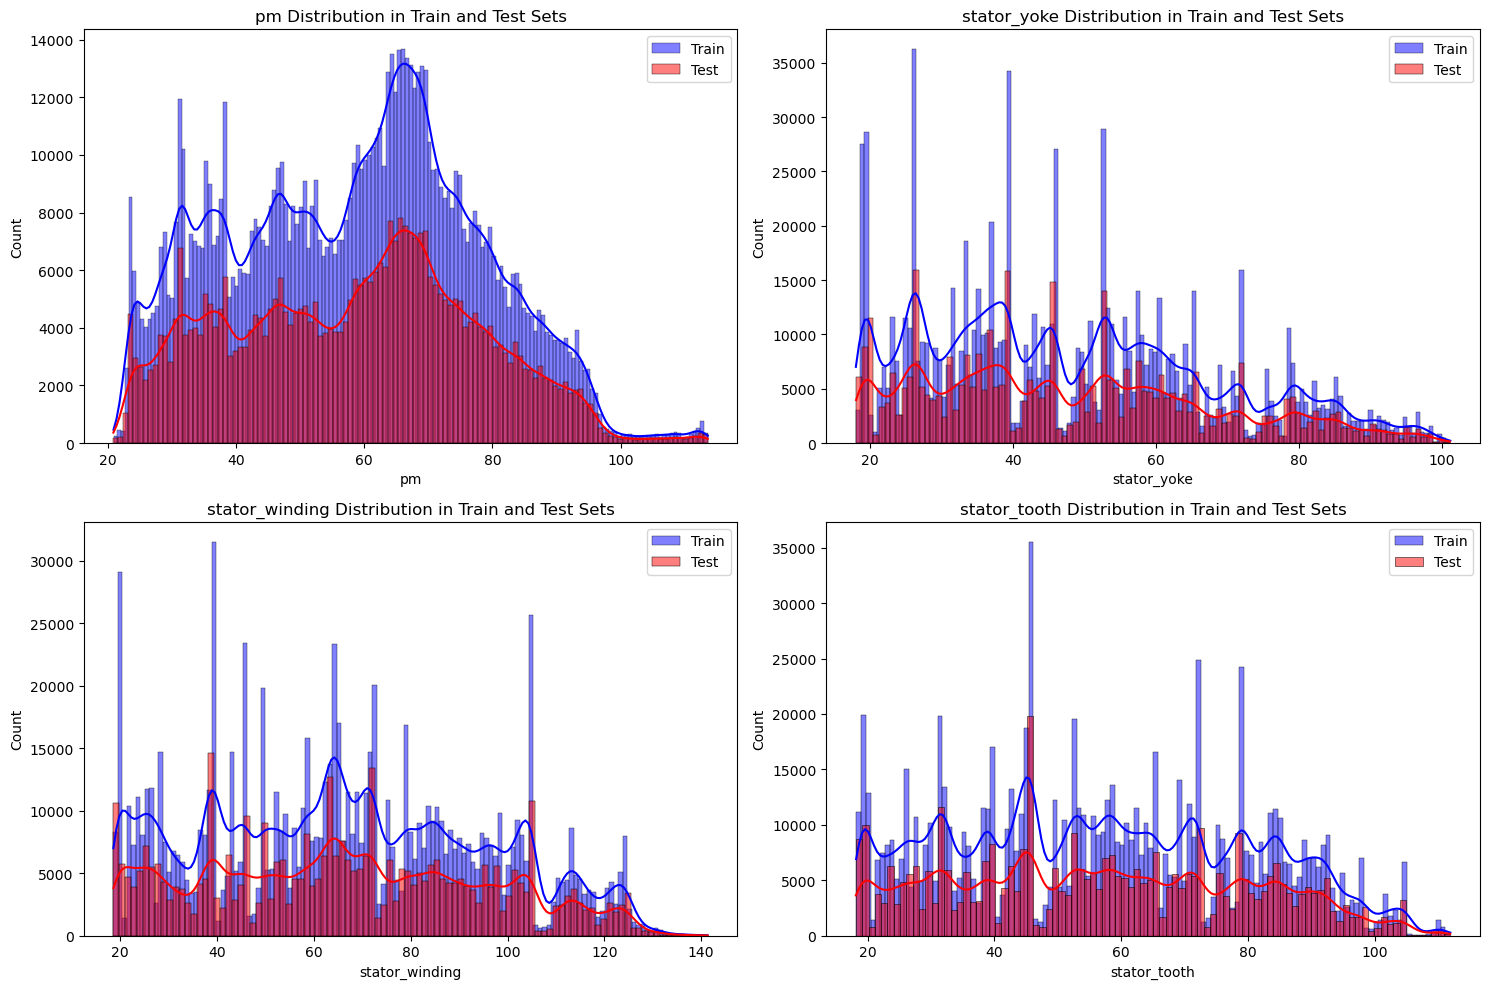

In [15]:



# Visualize the distribution of output labels in training and testing sets
plt.figure(figsize=(15, 10))
for i, label in enumerate(output_labels):
    plt.subplot(2, 2, i+1)
    sns.histplot(train_y[label], kde=True, color='blue', label='Train')
    sns.histplot(test_y[label], kde=True, color='red', label='Test', alpha=0.5)
    plt.title(f'{label} Distribution in Train and Test Sets')
    plt.legend()
plt.tight_layout()
plt.show()